# **Naïve Bayes Algorithm (MultinomialNB)**

The [Naïve Bayes classifier](https://www.ibm.com/topics/naive-bayes) is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

**Dataset:**    [UCI Machine Learning](https://archive.ics.uci.edu/dataset/380/youtube+spam+collection)

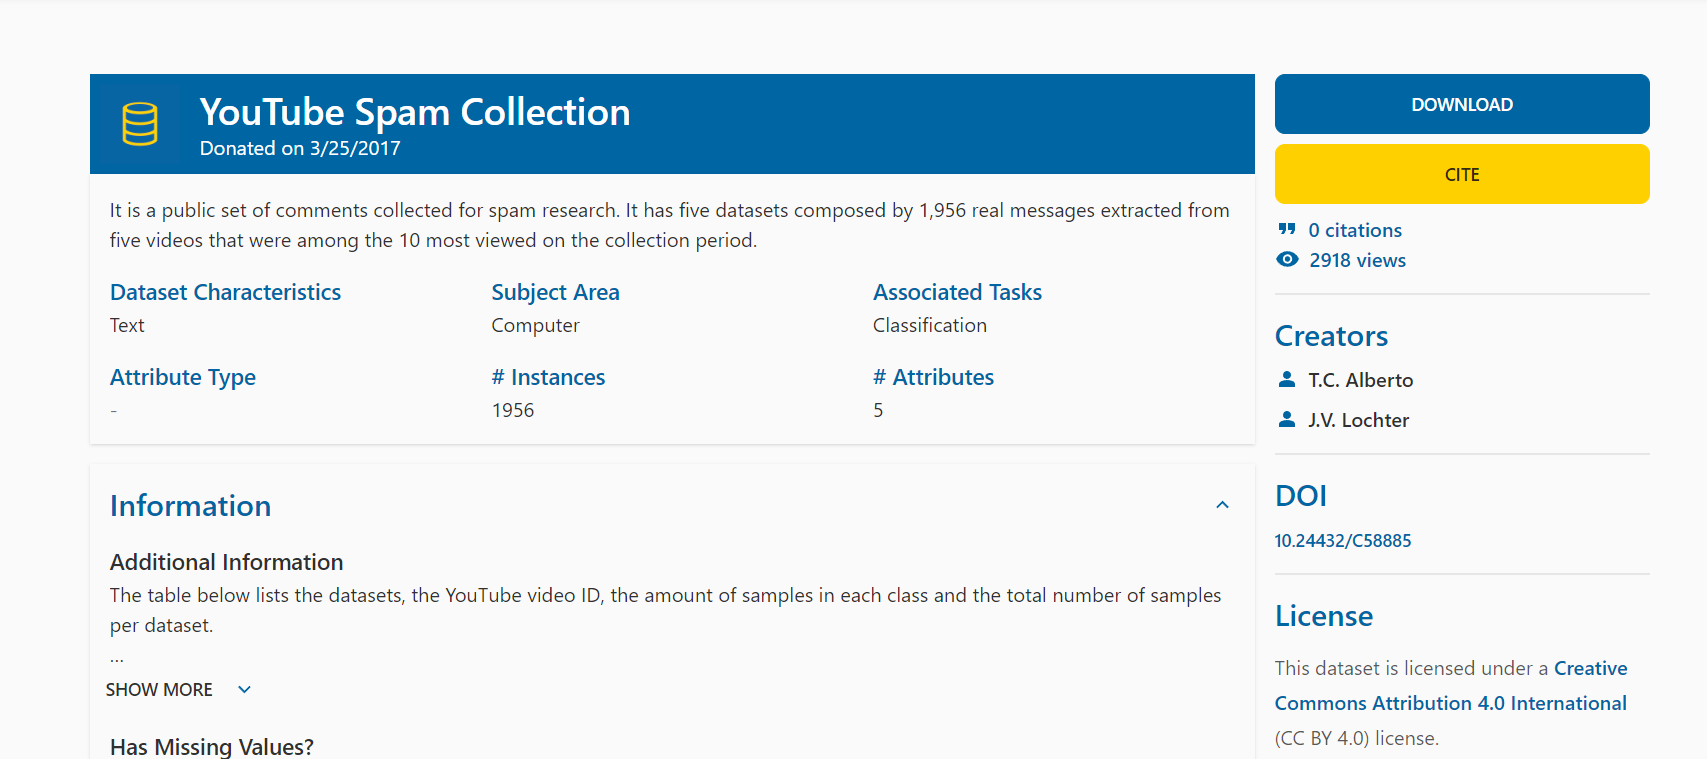

### **Import the necessary libraries**

In [1]:
import pandas as pd # pandas handles the data
import numpy as np # numpy for dealing with numerical python
import glob # finds the paths that match a specified pattern
import matplotlib.pyplot as plt # visualization
import seaborn as sns # for statistical visualization
from sklearn.feature_extraction.text import CountVectorizer # tokenize strings
from sklearn.model_selection import train_test_split # splitting the data into train and test set
from sklearn.naive_bayes import MultinomialNB # text classification
from sklearn.metrics import ConfusionMatrixDisplay, classification_report # to display the predictions

### **Reading the database**

In [15]:
# combine all csv files into one file
files = glob.glob("youtube-dataset\\*.csv")

In [16]:
# print files
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [17]:
# list to store all dataframe objects
all_df = []

# read the object in the files and drop the columns
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [18]:
# grad the first item to explore
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


### **Data wrangling and exploration**

In [19]:
# combine all samples into one big dataframe
data = pd.concat(all_df, axis = 0, ignore_index=True) # axis 0 means horizontal, ignore_index drop the original indexing enumerate from 0 to N-1

In [20]:
# check for missing values in the dataset
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [21]:
# check the amount of each value class
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

### **Plot of the class distribution**

In [22]:
# make a copy of the dataset
youtubeData_df = data.copy()

In [23]:
# plot the frequency of the CLASS
# sns.countplot(x='CLASS', hue = 'CLASS' ,data = youtubeData_df).set_title('Countplot-CLASS');

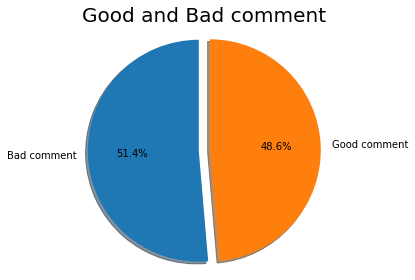

In [24]:
# visualize in a pie chart the bad comment vs good comment
labels = 'Bad comment', 'Good comment'
sizes = [youtubeData_df.CLASS[youtubeData_df['CLASS']==1].count(), youtubeData_df.CLASS[youtubeData_df['CLASS']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6.5, 4.5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Good and Bad comment", size = 20)
plt.show()

### **Count Vectorizer**




[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) : tokenize strings and count the occurence of each token within a comment.

### **Sample 1**

In [25]:
message_sample = ['This is a dog']

# initialize the countVectorizer object
vectorizer_sample = CountVectorizer()
# fit the object and the message
vectorizer_sample.fit(message_sample)
# transfrom the vectorizer sample
vectorizer_sample.transform(message_sample)
"""
The output will be a sparse matrix of type with
3 stored elements in compressed Sparse Row format
"""

'\nThe output will be a sparse matrix of type with\n3 stored elements in compressed Sparse Row format\n'

In [26]:
# to get the matrix itself we use the .toarray() method
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]], dtype=int64)

In [27]:
# feature names that will show that a certain word have appeard
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [28]:
# Another example
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]], dtype=int64)

### **Sample 2**

In [29]:
# assign a message to the object message sameple2
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']

# instantiate the countvecotrizer object
vectorizer_sample2 = CountVectorizer()
# fit transform
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]], dtype=int64)

In [30]:
# get features names
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [31]:
vectorizer_sample2.transform(['Those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

### **Defining the inputs and the target. Creating the train-test split**

In [32]:
inputs = data['CONTENT'] # all youtube commments
target = data['CLASS'] # y values

In [33]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,     # 20% is for test size
                                                    random_state = 365, # get the same values always
                                                    stratify = target) # equal portion of the target enter the training and testing set

In [34]:
# to check the portion of the target in each split of y_train
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [35]:
# to check the portion of the target in each split of y_test
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

## **Tokenizing the YouTube comments**

In [36]:
# create and instance of the Countvectorizer class
vectorizer = CountVectorizer()

In [37]:
# create a vocabulary dictionary containing the words from the training dataset
x_train_transf = vectorizer.fit_transform(x_train) # apply the fit_transform with a single argument x_train
x_test_transf = vectorizer.transform(x_test) # apply on the test dataset

In [38]:
# visualize the x_train_transf.toarray
x_train_transf.toarray() # contain mainly zeros therefore referred to as a sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# explore the shape of the train matrix
x_train_transf.shape

(1564, 3925)

In [40]:
# explore the shape of the test matrix
x_test_transf.shape

(391, 3925)

## **Performing the classification:**

For more on [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) from sklearn.

In [41]:
# instatiate the classifier object
clf = MultinomialNB()

In [42]:
%%time
# let the model learn from the data by applying the .fit method
clf.fit(x_train_transf, y_train)

CPU times: total: 0 ns
Wall time: 5.99 ms


MultinomialNB()

In [43]:
# explore the model's parameters
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

### **This step for parameter tuning:**

In [44]:
# explore the parameters of the MultinomialNB()
np.exp(clf.class_log_prior_)

array([0.48657289, 0.51342711])

In [45]:
# add new parameter class_prior
clf = MultinomialNB(class_prior = np.array([0.6, 0.4]))

In [46]:
%%time
# let the model learn from the data by applying the .fit method
clf.fit(x_train_transf, y_train)

CPU times: total: 0 ns
Wall time: 4.01 ms


MultinomialNB(class_prior=array([0.6, 0.4]))

## **Performing the evaluation on the test dataset:**

In [47]:
# predict the values using the clf model
y_test_pred = clf.predict(x_test_transf)

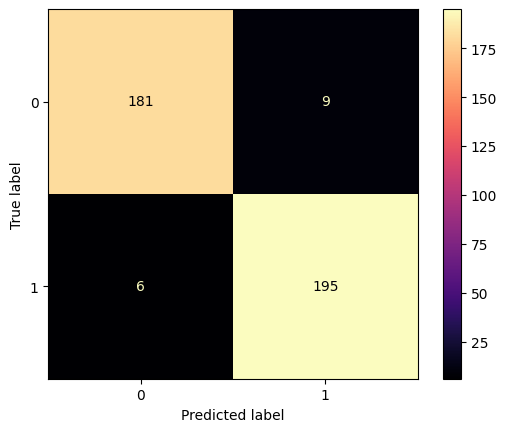

In [48]:
sns.reset_orig() # to remove the seaborn visual

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

## **Metrics:**

In [49]:
# print a summary classification_report
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



### **Creating probability-distribution figures**

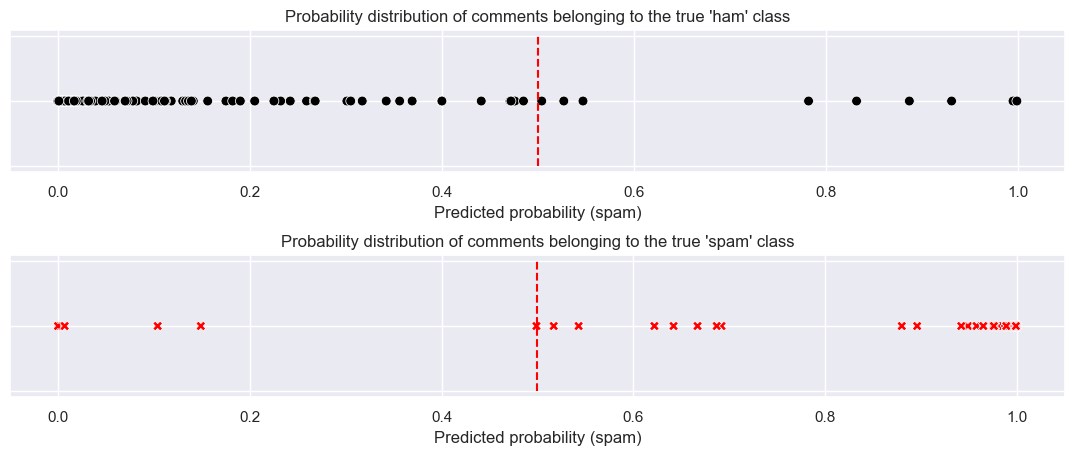

In [50]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot.
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

### **Making predictions:**

In [51]:
# Choose the messages whose class you want to predict and put them in a list.
# Using the vectorizer, transform the messages and store the result in a variable called 'predict_data'.
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [52]:
# Call the 'predict()' method and use 'predict_data' as an argument.
# The classifier correctly predicts the two messages.
clf.predict(predict_data)

array([0, 1], dtype=int64)

## **Now over to you find a dataset and apply the Naive Bayes algorithm: GOOD LUCK!**